In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# imports csvs with results from votingbetter3.py
rfptp = pd.read_csv('pastelections/rfptp.csv')
rfptp['r/a'] = 'r'
rfptp['fptp/ord'] = 'fptp'
rfptp['type'] = 'rfptp'
rord = pd.read_csv('pastelections/rord.csv')
rord['r/a'] = 'r'
rord['fptp/ord'] = 'ord'
rord['type'] = 'rord'
afptp = pd.read_csv('pastelections/afptp.csv')
afptp['r/a'] = 'a'
afptp['fptp/ord'] = 'fptp'
afptp['type'] = 'afptp'
aord = pd.read_csv('pastelections/aord.csv')
aord['r/a'] = 'a'
aord['fptp/ord'] = 'ord'
aord['type'] = 'aord'
finres = pd.concat([rfptp, rord, afptp, aord], ignore_index=True)
finres['winner'] = pd.Categorical(finres['winner'], categories=['green', 'red', 'blue', 'purple', 'yellow'], ordered=True)
finres


,winner,wastedvotes,wastedprop (%),green,red,blue,purple,yellow,r/a,fptp/ord,type
0,purple,12299.0,40.996667,14.0,NaN,25.0,250.0,11.0,r,fptp,rfptp
1,green,5659.0,18.863333,193.0,1.0,98.0,7.0,1.0,r,fptp,rfptp
2,purple,9233.0,30.776667,147.0,NaN,NaN,152.0,1.0,r,fptp,rfptp
3,green,8288.0,27.626667,261.0,31.0,NaN,5.0,3.0,r,fptp,rfptp
4,red,7803.0,26.010000,NaN,142.0,27.0,125.0,6.0,r,fptp,rfptp
...,...,...,...,...,...,...,...,...,...,...,...
1195,blue,3296.0,10.986667,31.0,20.0,212.0,21.0,16.0,a,ord,aord
1196,blue,4260.0,14.200000,37.0,24.0,186.0,30.0,23.0,a,ord,aord
1197,blue,3697.0,12.323333,27.0,26.0,204.0,19.0,24.0,a,ord,aord
1198,blue,3744.0,12.480000,21.0,26.0,190.0,39.0,24.0,a,ord,aord


In [ ]:
# creates a table of wastedprop for each subsection
rfwp = rfptp['wastedprop (%)'].mean()
rowp = rord['wastedprop (%)'].mean()
afwp = afptp['wastedprop (%)'].mean()
aowp = aord['wastedprop (%)'].mean()
d = {'fptp': [rfwp, afwp], 'ord': [rowp, aowp]}
rescross = pd.DataFrame(data=d, index=['r', 'a'])
rescross

,fptp,ord
r,26.859689,21.512522
a,34.339989,13.917289


ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 1200 and the vector passed to `weights` has length 5.

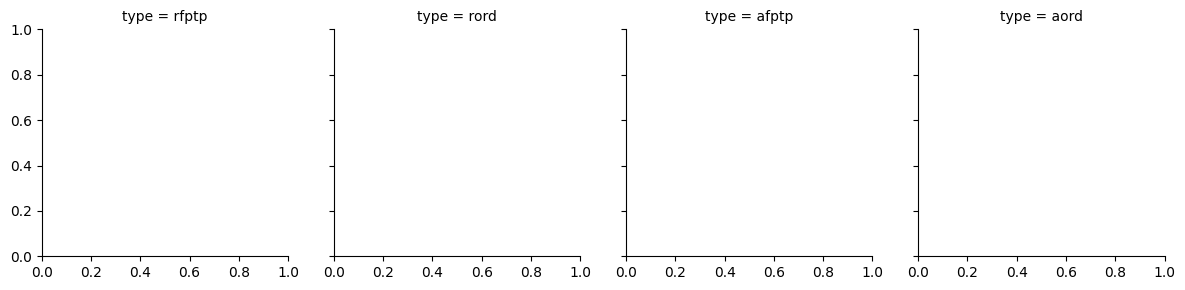

In [ ]:
# This was working before, just isn't now for some reason. it did generate average party results for each subsection
partycolumns = ['green', 'red', 'blue', 'purple', 'yellow']
g = sns.FacetGrid(finres, col="type")
g = g.map(sns.histplot, data=finres, x="winner", weights=partycolumns)
plt.show()

<Axes: xlabel='type', ylabel='wastedprop (%)'>

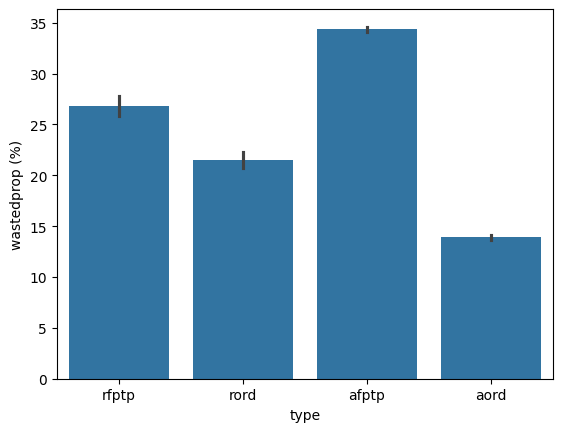

In [8]:
sns.barplot(data=finres, x='type', y='wastedprop (%)')

In [ ]:
# two-tailed ANOVA inferential statistics
finresmodel = finres.rename(columns={'wastedprop (%)': 'wastedprop', 'fptp/ord': 'fptpord', 'r/a': 'ra'})
model = ols('wastedprop ~ C(fptpord) + C(ra) + C(fptpord):C(ra)', data=finresmodel).fit()
anovaresult = sm.stats.anova_lm(model, type=2)
anovaresult


,df,sum_sq,mean_sq,F,PR(>F)
C(fptpord),1.0,49806.452101,49806.452101,1539.702257,4.014250e-217
C(ra),1.0,0.990725,0.990725,0.030627,8.611048e-01
C(fptpord):C(ra),1.0,17045.377896,17045.377896,526.935883,6.512301e-97
Residual,1196.0,38688.334991,32.348106,NaN,NaN


In [ ]:
# correlation matrix with different variables, random party positions
finresmodelr = finresmodel[finresmodel['ra'] == 'r']
selected_columns = ['wastedprop', 'green', 'red', 'blue', 'purple', 'yellow']
finresmodelr[selected_columns].corr()

,wastedprop,green,red,blue,purple,yellow
wastedprop,1.000000,-0.246634,-0.246236,-0.173739,-0.256115,-0.283508
green,-0.246634,1.000000,-0.443115,-0.374009,-0.306211,-0.338340
red,-0.246236,-0.443115,1.000000,-0.381563,-0.283393,-0.312773
blue,-0.173739,-0.374009,-0.381563,1.000000,-0.385660,-0.420582
purple,-0.256115,-0.306211,-0.283393,-0.385660,1.000000,-0.296239
yellow,-0.283508,-0.338340,-0.312773,-0.420582,-0.296239,1.000000
